In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# List of column names we want to assign to the dataset
cols = ["fLength","fWidth","fSize","fConc","fConc1","fAsym",
        "fM3Long","fM3Trans","fAlpha","fDist","class"]

# Read the CSV file "magic04.data"
# names=cols means: since the file has no header row, use our "cols" list as column headers
df = pd.read_csv("magic04.data", names=cols)

# Show the first 5 rows of the dataset (just to preview the data)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
df["class"].unique() #Show me all the different (distinct) values present in the class column of the DataFrame df
#Example

# If your class column has:
# [0, 1, 0, 1, 1]

# Then:
# [0, 1]

array(['g', 'h'], dtype=object)

In [ ]:
# Convert the "class" column into binary (0 and 1)
# (df["class"] == "g") checks each row:
#   - True if value is "g"
#   - False if value is not "g" (like "h")
df["class"] = (df["class"] == "g").astype(int)

# .astype(int) converts:
#   True  -> 1
#   False -> 0

In [ ]:
df.head() # Show the first 5 rows of the dataset (just to preview the data)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


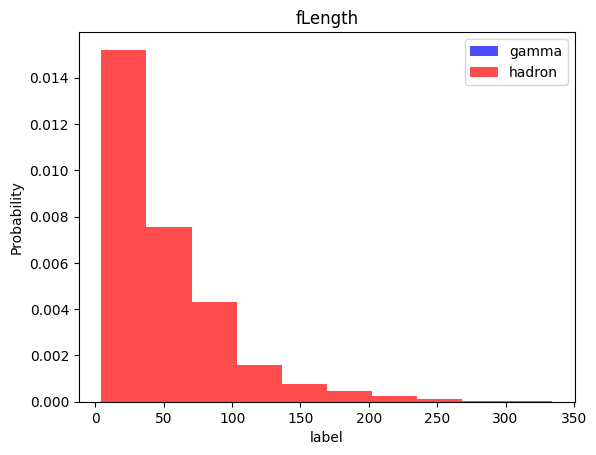

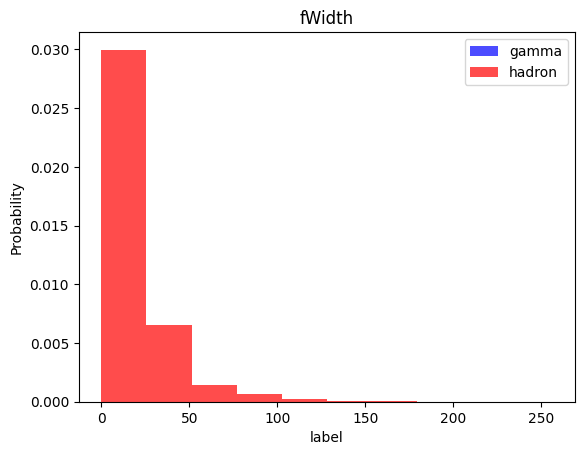

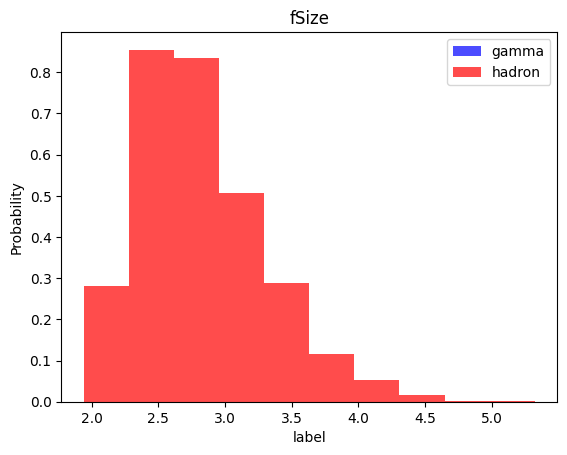

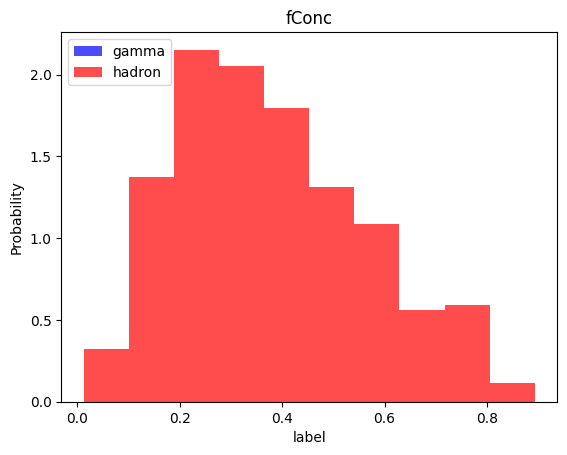

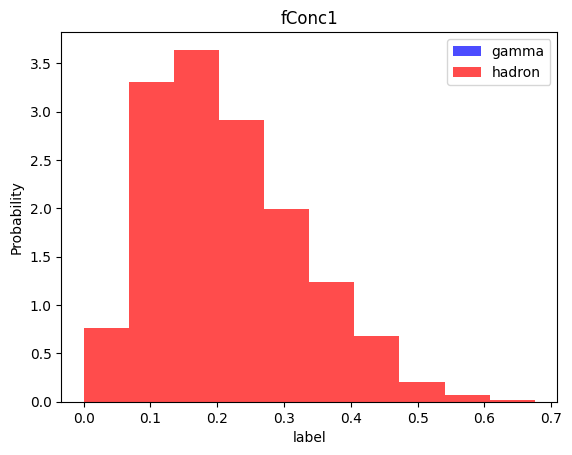

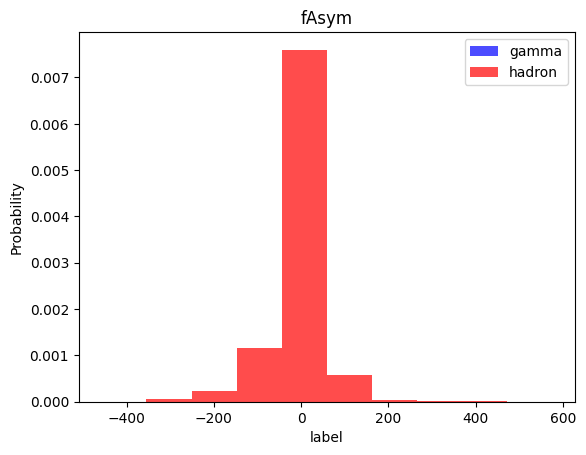

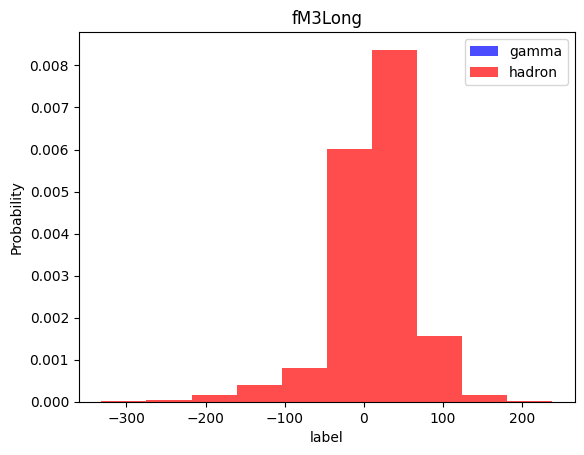

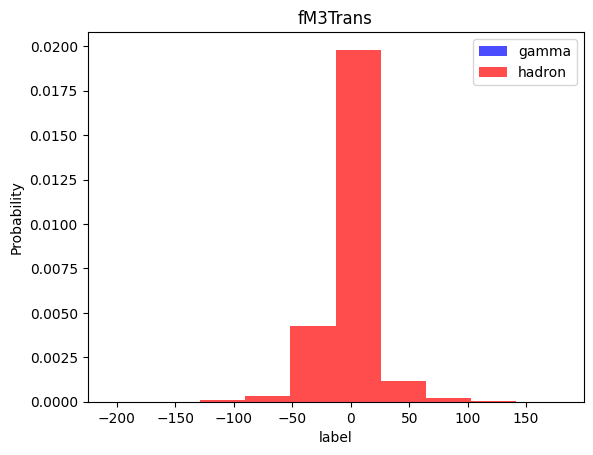

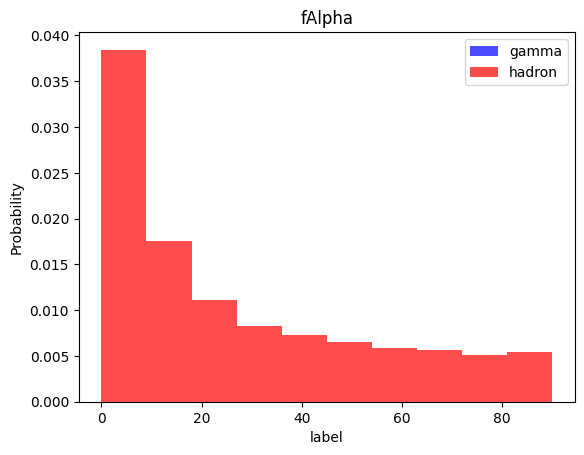

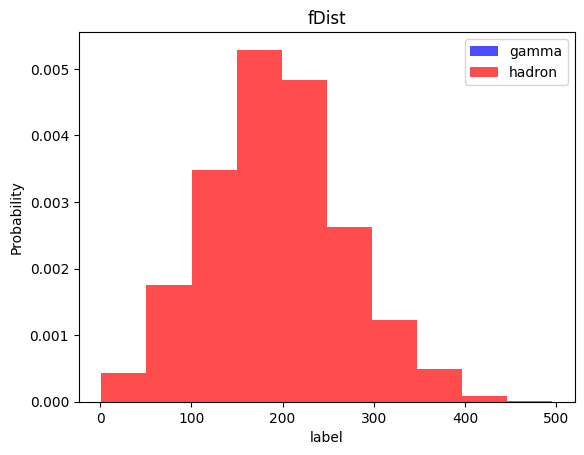

In [ ]:
# Loop through each feature column (except the last column "class")
# cols[:-1] means: take all columns from cols list, excluding the last one
for label in cols[:-1]:

    # Plot histogram for rows where class == 1 (Gamma class)
    # df[df["class"]==1] filters only gamma rows
    # [label] selects the current feature column
    plt.hist(
        df[df["class"] == 1][label],   # data values for gamma class for this feature
        color='blue',                  # histogram color = blue
        label='gamma',                 # legend name for this histogram
        alpha=0.7,                     # transparency (0=fully transparent, 1=solid)
        density=True                   # normalize histogram into probability density
    )

    # Plot histogram for rows where class == 0 (Hadron class)
    plt.hist(
        df[df["class"] == 0][label],   # data values for hadron class for this feature
        color='red',                   # histogram color = red
        label='hadron',                # legend name for this histogram
        alpha=0.7,                     # transparency
        density=True                   # normalized probability density
    )

    # Set the title of the plot as the feature name (example: fLength, fWidth, etc.)
    plt.title(label)

    # Set Y-axis label
    plt.ylabel("Probability")

    # Set X-axis label (you wrote "label" as text, not the variable)
    plt.xlabel("label")

    # Show legend box with "gamma" and "hadron"
    plt.legend()

    # Display the histogram plot for the current feature
    plt.show()


## TRAIN , VALIDATION,TEST DATASETS

In [ ]:
# Split the dataframe into Train, Validation, and Test sets

# df.sample(frac=1) -> randomly shuffles the entire dataframe (frac=1 means take 100% rows)
# len(df) -> total number of rows in the dataframe
# int(0.6 * len(df)) -> index where 60% of the data ends (Train set end)
# int(0.8 * len(df)) -> index where 80% of the data ends (Validation set end)
# np.split(...) -> splits the shuffled dataframe into 3 parts using those two cut points

train, valid, test = np.split(
    df.sample(frac=1),                     # shuffle data randomly
    [int(0.6 * len(df)), int(0.8 * len(df))]  # split at 60% and 80%
)


C:\Users\Shreyas\AppData\Roaming\Python\Python313\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
## When you look at the dataset you see that some columns have very different ranges
# Example: one column can have values like 0.01 while another can have 200+
# This difference can affect model training, so we scale/standardize the dataset

def scale_dataset(dataframe, oversample=False):
    
    # x will store all feature columns (all columns except the last one)
    # dataframe.columns[:-1] means: take every column except the last one ("class")
    # .values converts it into a NumPy array
    x = dataframe[dataframe.columns[:-1]].values
    
    # y will store the target/label column (the last column which is "class")
    # dataframe.columns[-1] means: take the last column
    y = dataframe[dataframe.columns[-1]].values
    
    # Create a StandardScaler object
    # StandardScaler scales data so that:
    # mean becomes 0 and standard deviation becomes 1
    scaler = StandardScaler()
    
    # Fit the scaler on x and transform x
    # This scales all features properly
    x = scaler.fit_transform(x)
    
    # If oversample=True, then balance the classes (0 and 1)
    # RandomOverSampler adds more rows of the minority class to make both classes equal
    if oversample:
        ros = RandomOverSampler()
        x, y = ros.fit_resample(x, y)
    
    # Combine scaled features (x) and labels (y) back into one NumPy array
    # np.reshape(y, (-1,1)) converts y into a column shape like:
    # (n,) -> (n,1)
    # np.hstack joins x and y side by side horizontally
    data = np.hstack((x, np.reshape(y, (-1, 1))))
    
    # Return:
    # data -> full scaled dataset (features + class)
    # x    -> only scaled features
    # y    -> only target labels
    return data, x, y


In [ ]:
# Scale the TRAIN dataset and also oversample it
# oversample=True means: balance the classes (0 and 1) using RandomOverSampler
# Returns:
# train   -> scaled + oversampled full dataset (features + class)
# x_train -> scaled feature values only
# y_train -> labels/target values only
train, x_train, y_train = scale_dataset(train, oversample=True)

# Scale the VALIDATION dataset but DO NOT oversample
# oversample=False means: keep validation data natural/realistic for fair evaluation
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)

# Scale the TEST dataset but DO NOT oversample
# oversample=False means: keep test data untouched to check real performance
test, x_test, y_test = scale_dataset(test, oversample=False)


In [ ]:
# Gives the total number of samples (rows) in the training labels
# y_train contains the class/target values for the training dataset
len(y_train)


14722

In [ ]:
# Counts how many samples in y_train belong to class 1
# (y_train == 1) creates a True/False array, and sum() counts the True values
sum(y_train == 1)

np.int64(7361)

In [ ]:
# Counts how many samples in y_train belong to class 0
# (y_train == 0) creates a True/False array, and sum() counts the True values
sum(y_train == 0)

np.int64(7361)

## kNN

In [ ]:
# KNN (K-Nearest Neighbors) is a simple ML algorithm:
# It predicts a new point by checking the "k" closest training points and taking majority vote.
# Here k=3, so prediction is based on the nearest 3 neighbors.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
# Create a K-Nearest Neighbors (KNN) classifier model
# n_neighbors=3 means it will look at the 3 closest data points to make a prediction
knn_model = KNeighborsClassifier(n_neighbors=3)

# Train (fit) the KNN model using training data
# x_train = input features
# y_train = target labels (class 0 or 1)
knn_model.fit(x_train, y_train)


,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [ ]:
# Use the trained KNN model to predict the class labels for the test data
# x_test = test features
# y_pred will store the predicted output classes (0 or 1)
y_pred = knn_model.predict(x_test)


In [ ]:
# Print a detailed evaluation report of your model predictions
# It shows how well the model performed for each class (0 and 1)
print(classification_report(y_test, y_pred))

# --- Explanation of output terms ---
# precision: Out of all predictions made for a class, how many were correct?
# recall: Out of all actual samples of a class, how many did the model correctly find?
# f1-score: Harmonic mean of precision and recall (balanced performance score)
# support: Total number of actual samples present for that class in y_test

# --- Your results ---
# Class 0:
# precision = 0.73, recall = 0.73, f1 = 0.73 (decent performance)
# support = 1297 means there are 1297 actual class 0 samples in the test set

# Class 1:
# precision = 0.86, recall = 0.86, f1 = 0.86 (better performance)
# support = 2507 means there are 2507 actual class 1 samples in the test set

# accuracy:
# Overall correct predictions out of total test samples = 0.82 (82%)

# macro avg:
# Average of metrics for both classes equally (does not care about class imbalance)

# weighted avg:
# Average of metrics but weighted by support (gives more importance to class with more samples)


              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1297
           1       0.86      0.86      0.86      2507

    accuracy                           0.82      3804
   macro avg       0.79      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



## NAIVE BAYES

In [ ]:
# Naive Bayes is a probabilistic ML algorithm:
# It predicts the class based on probability using Bayes’ theorem.
# "Naive" means it assumes all features are independent of each other.
# GaussianNB is used when features are continuous (numeric) and follow a normal distribution.

from sklearn.naive_bayes import GaussianNB

In [ ]:
# Create the Naive Bayes model (Gaussian Naive Bayes)
nb_model = GaussianNB()

# Train (fit) the model using training data
# x_train = input features, y_train = target labels
nb_model = nb_model.fit(x_train, y_train)


In [ ]:
# Predict the class labels for the test dataset using the trained Naive Bayes model
# x_test = test feature values
# y_pred will store predicted class labels (0 or 1)
y_pred = nb_model.predict(x_test)

# Print the classification report to evaluate Naive Bayes performance
# Compares y_pred (predicted) with y_test (actual)
# Shows precision, recall, f1-score, support, and overall accuracy
print(classification_report(y_test, y_pred))
# --- Naive Bayes classification report explanation ---

# Class 0 results:
# precision = 0.63 -> when model predicts class 0, it is correct 63% of the time
# recall    = 0.41 -> model only found 41% of all actual class 0 samples (misses many 0s)
# f1-score  = 0.50 -> overall weak performance for class 0
# support   = 1297 -> total actual class 0 samples in test set

# Class 1 results:
# precision = 0.74 -> when model predicts class 1, it is correct 74% of the time
# recall    = 0.87 -> model correctly finds 87% of all actual class 1 samples (good)
# f1-score  = 0.80 -> strong performance for class 1
# support   = 2507 -> total actual class 1 samples in test set

# accuracy = 0.72 -> overall 72% predictions are correct (both classes combined)

# macro avg:
# average of both classes equally (shows the model is weaker overall because class 0 is poor)

# weighted avg:
# average weighted by support (class 1 has more samples, so overall score looks better)



              precision    recall  f1-score   support

           0       0.63      0.41      0.50      1297
           1       0.74      0.87      0.80      2507

    accuracy                           0.72      3804
   macro avg       0.68      0.64      0.65      3804
weighted avg       0.70      0.72      0.70      3804

